In [31]:
import matplotlib.pyplot as plt
from strategy import (
    staking,
    bonding_with_restake
)


In [32]:
rebase_rate = 0.6203  # %
bond_discount = 6.24  # %
principal = 10000  # $
price = 8700  # $
roi_5d = (1+rebase_rate/100)**(3*5) - 1
apy = (1+rebase_rate/100)**(3*365) - 1


In [33]:
print(f'roi_5d = {roi_5d:,.2%}')
print(f'apy = {apy:,.0%}')


roi_5d = 9.72%
apy = 87,145%


In [34]:
def restaking_strategy(schedule=None):
    return bonding_with_restake(principal, price,
                                restake_schedule=schedule,
                                rebase_rate=rebase_rate, bond_discount=bond_discount, fee=0.0)


strategies = {
    'Just staking': staking(principal, price, rebase_rate=rebase_rate),
    'Bonding with perfect restaking': restaking_strategy(),
    'Restake once per day': restaking_strategy(
        [False, True, False]*5),
    'Restake once in day 3': restaking_strategy(
        [False]*7 + [True] + [False]*7,),
    'Restaked once in day 2 and day 4 each': restaking_strategy(
        [i in (4,10) for i in range(15)]),
}


In [35]:
for name, result in strategies.items():
    print(f'{name:>40}: roi 5d = {result.roi:9.4%}, ')


                            Just staking =   9.7196%
          Bonding with perfect restaking =  11.6678%
                    Restake once per day =  11.0259%
                   Restake once in day 3 =   9.1136%
   Restaked once in day 2 and day 4 each =  10.0672%


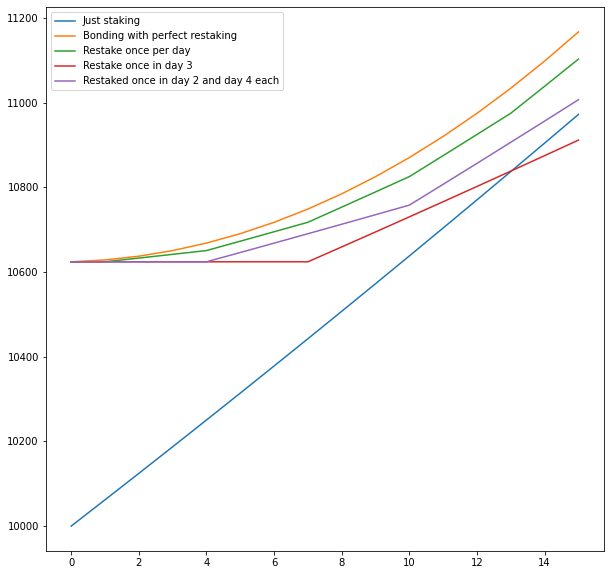

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for name, result in strategies.items():
    ax.plot([v.value for v in result.balance], label=name)
ax.legend()
